In [57]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import numpy as np
import pandas as pd
import scipy
from scipy import stats
from statistics import *

## Importando dados

In [58]:
#Consumo de álcool nos países
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2010_alcohol_consumption_by_country.csv')
df = data[0:10]

df

,location,alcohol
0,Belarus,17.5
1,Moldova,16.8
2,Lithuania,15.4
3,Russia,15.1
4,Romania,14.4
5,Ukraine,13.9
6,Andorra,13.8
7,Hungary,13.3
8,Czech Republic,13.0
9,Slovakia,13.0


## Média e variância

Duas das operações estatísticas mais básicas são a média µ e o desvio padrão σ de uma matriz de dados unidimensional, ou seja, uma sequência de valores numéricos. A média de um conjunto de números $ x_1, ..., x_N $ é definida como:


$ \mu = \sum_{i=1}^N x_i $

A média é usada coloquialmente como a média de um conjunto de valores. O desvio padrão, por outro lado, é uma métrica estatística que descreve a dispersão dos dados ou a que distância os valores estão da média. O desvio padrão de um conjunto de dados é definido como:

$ s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \mu)^2} $


[\[fonte\]](https://plot.ly/python/v3/basic-statistics/)

In [59]:
média = np.mean(data['alcohol'])
desvio_padrão = np.std(data['alcohol'])

print("A média é: ", mean)
print("O desvio_padrão é:  ", st_dev)

A média é:  <function mean at 0x7f41ebaa57a0>
O desvio_padrão é:   4.1306710006354


## Mediana 

Mediana é o valor que separa a metade maior e a metade menor de uma amostra, uma população ou uma distribuição de probabilidade. Em termos mais simples, mediana pode ser o valor do meio de um conjunto de dados. No conjunto de dados {1, 3, 3, 6, 7, 8, 9}, por exemplo, a mediana é 6. Se houver um número par de observações, não há um único valor do meio. Então, a mediana é definida como a média dos dois valores do meio. No conjunto de dados {3, 5, 7, 9}, a mediana é:

$ {\displaystyle {\frac {5+7}{2}}=6}$. 

[\[fonte\]](http://mathworld.wolfram.com/StatisticalMedian.html)

In [60]:
intervalo = [1, 3, 3, 6, 7, 8, 9]
mediana_intervalo = np.median(intervalo)
print("A mediana do intervalo é:", mediana_intervalo)


mediana_dataset = np.median(data['alcohol'])
print("A mediana do dataset é: ", mediana_dataset)

A mediana do intervalo é: 6.0
A mediana do dataset é:  6.4


## Quantil

O quantil pode ser entendido como uma generalização da mediana. O quantil é o valor abaixo do qual está um certo percentual dos dados. No caso da mediana, esse percentual é de 50%. Vejamos o código para o quantil, que pode ser calculado através da função quantile(). Esta função, por padrão, adota o percentual (representado através do parâmetro q) de 50%, ou seja, é uma mediana por padrão. Você pode configurar outros percentuais através deste mesmo parâmetro:

In [61]:
# Equivalente ao primeiro quartil
# Ou seja: divede a distribuição em 25% abaixo e 75% acima
primeiro_quartil = data['alcohol'].quantile(q = 0.25)

# Equivalente ao quarto decil
# Ou seja: divede a distribuição em 40% abaixo e 60% acima
quarto_decil = data['alcohol'].quantile(q = 0.4)

print("O valor referente ao  primeiro quartil é: ", primeiro_quartil)
print("O valor referente ao  quarto decil é: ", quarto_decil)

O valor referente ao  primeiro quartil é:  2.6
O valor referente ao  quarto decil é:  4.6


## Moda

Em estatística, moda é uma das medidas de altura de um conjunto de dados, assim como a média e a mediana. Ela pode ser definida em moda amostral e populacional.

Em relação à primeira delas, a moda amostral de um conjunto de dados trata do valor que ocorre com maior frequência ou o valor mais comum em um conjunto de dados. Moda é especialmente útil quando os valores ou as observações não são numéricos, casos em que a média e a mediana não podem ser definidas. Por exemplo, a moda da amostra \[maçã, banana, laranja, laranja, laranja, pêssego\] é laranja. Moda amostral não é necessariamente única como média ou mediana. Amostras que possuem uma moda são chamadas unimodais. Por exemplo, a amostra \[1, 2, 3, 5, 5, 6, 7\] tem moda 5. Amostras que possuem duas modas são chamadas bimodais. Por exemplo, a amostra \[1, 2, 3, 5, 5, 6, 6\] tem modas 5 e 6. Amostras que possuem várias modas são chamadas multimodais. Por exemplo, a amostra \[1, 2, 3, 5, 5, 6, 6, 7, 7\] tem modas 5, 6 e 7. Amostras que não possuem moda são chamadas amodais. Por exemplo, a amostra \[1, 3, 2, 5, 7, 6\] não tem moda.
[\[fonte\]](http://www.pucrs.br/edipucrs/erematsul/minicursos/modaestatistica.pdf)


In [62]:
intervalo = [1, 2, 3, 5, 5, 6, 7]
moda = mode(intervalo)

print('A moda do intervalo é: ', moda)

A moda do intervalo é:  5


## Amplitude
A amplitude nada mais é do que a diferença entre o maior e o menor valor de um conjunto de dados. Para isso, pode-se usar as funções `max()` e `min()`, que retornam o valor máximo e mínimo de um conjunto de dados, e depois subtrairemos um do outro:

In [63]:
amplitude = data['alcohol'].max() - data['alcohol'].min()
print('A amplitude do intervalo é: ', amplitude)

A amplitude do intervalo é:  17.4


## Histograma

histograma, também conhecido como distribuição de frequências, é a representação gráfica em colunas ou em barras (retângulos) de um conjunto de dados previamente tabulado e dividido em classes uniformes ou não uniformes. A base de cada retângulo representa uma classe. A altura de cada retângulo representa a quantidade ou a frequência absoluta com que o valor da classe ocorre no conjunto de dados para classes uniformes ou a densidade de frequência para classes não uniformes. [\[fonte\]](https://books.google.com.br/books?id=-FlCFbIluaQC&printsec=frontcover&hl=pt-BR#v=onepage&q&f=false)

In [64]:
import plotly.express as px

#passamos o dataframe e a coluna Alcohol como valores do eixo x
fig = px.histogram(data, x="alcohol", nbins=30)
fig.show()

## Gráfico de dispersão

Os diagramas de dispersão ou gráficos de dispersão são representações de dados de duas (tipicamente) ou mais variáveis que são organizadas em um gráfico. O gráfico de dispersão utiliza coordenadas cartesianas para exibir valores de um conjunto de dados. Os dados são exibidos como uma coleção de pontos, cada um com o valor de uma variável determinando a posição no eixo horizontal e o valor da outra variável determinando a posição no eixo vertical (em caso de duas variáveis).[\[fonte\]](https://www.itl.nist.gov/div898/handbook/eda/section3/scatterp.htm)

In [93]:
#test = data.sample(frac=1)


fig = px.scatter(data, x='alcohol')

fig.show()


## Distribuição normal

A distribuição Normal é uma das mais importantes distribuições de probabilidade pois muitos fenômenos aleatórios comportam-se próximos a essa distribuição:
* altura;
* pressão sangüínea;
* Peso

Pode ser utilizada para calcular, de forma aproximada, probabilidades para outras distribuições, como por exemplo, para a distribuição binomial [\[fonte\]](https://www.ime.usp.br/~hbolfar/aula_2013/Aula6-A12012.pdf)

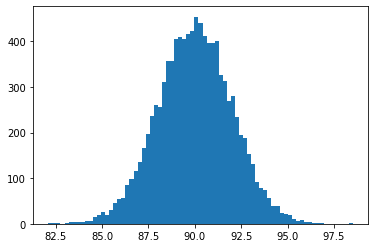

In [97]:
values= np.random.normal(90,2, 10000)
plt.hist(values,75)
plt.show()
